# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

##Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page the same for the different language users?

Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import all relevant libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import scipy.stats as stats

## Reading the Data into a DataFrame

In [3]:
data = pd.read_csv('/content/abtest.csv') # Reading the data into the dataframe
df = data.copy() # creating a copy of the dataset

## Performing sanity checks on the dataset

In [ ]:
# Checking the top 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Observations
#### The dataset has six(6) columns consisting of two columns with numerical data and 4 columns with categorical data. For the columns with numerical data, the user_id is a unique identifier and therefore its statistics will not yield any actionable insight unlike the time_spent_on_the_page column.


In [ ]:
# Checking the bottom 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Checking the number of rows and columns in the dataset
df.shape

(100, 6)

## Observation
#### The dataset has 100 rows and 6 columns

In [ ]:
# Checking the datatypes contained in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Observation
#### The different datatypes contained in the dataset includes the integer (user_id), string or object (group, landing_page, converted, language_preferred) and the float (time_spent_on_the_page).
#### From the Non-Null Count, it can be noticed that there are no missing data and the memory usage is about 4.8 KB

In [ ]:
# Obtaining the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


##Observation
####It will be observed from the data that on an average, a user spends 5.4 minutes on the page and the on the whole, the time spent by subscribers ranges from 0.19 minutes to 10.71 minutes.
####Since the mean and the median time spent by the users on the page are almost identical, the distribution of the dataset could be assumed to be normal.
####The statistics of the user_id does not present any insight since it is a unique identifier

In [ ]:
# Obtaining the summary statistics including the categorical data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

## Observation
#### There are no missing values present in the dataset

In [13]:
df.duplicated().sum()

0

## Observation
#### There are no duplicated rows in the dataset


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Univariate Analysis

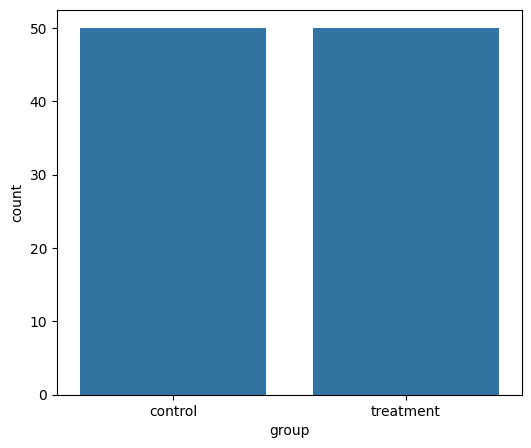

In [ ]:
# Obtaining the count plot of the group column
plt.figure(figsize = (6,5))
sns.countplot(data = df, x = 'group')
plt.show()


In [ ]:
# Obtaining the numbers in each group i.e. the control and treatment groups
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

##Observation
#### It will be observed that both the control and treatment groups have the same value (50) which is in tandem with what was stated in the problem statement

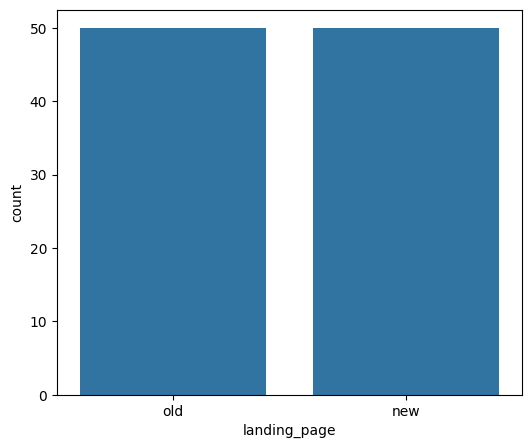

In [ ]:
# Obtaining the plot for the landing page data
plt.figure(figsize = (6,5))
sns.countplot(data = df, x = 'landing_page')
plt.show()

In [ ]:
# Obtaining the number of the oil and new landing page
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

##Observation
####The number of the users that visits both the old and new landing page are the same.

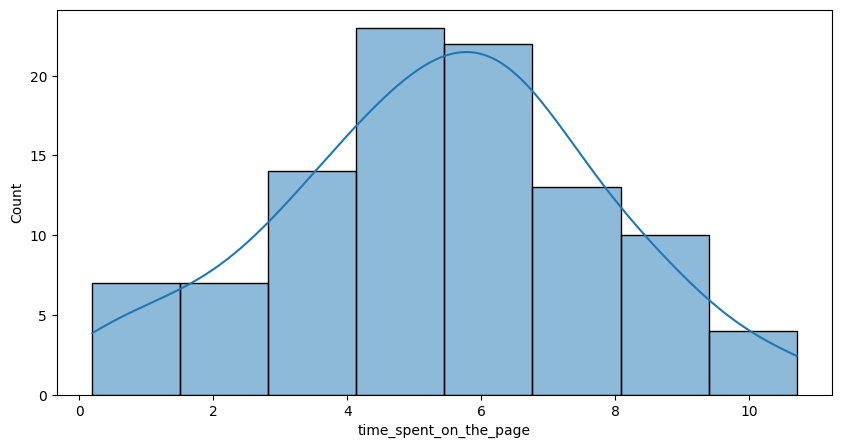

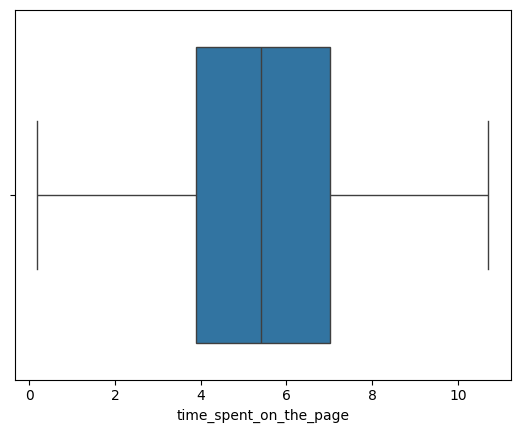

In [ ]:
# Plot of the histogram showing the distribution of the time spent on the page by subscribers
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'time_spent_on_the_page', kde = True)
plt.show()
sns.boxplot(data = df, x = 'time_spent_on_the_page')
plt.show()


##Observation
####The data for the time_spent_on_the_page appears to follow a normal distribution. The number of subscribers that spent about 5 minutes on the page appears to be the highest (about 30) and closely followed by those that spent 6 minutes on the page.
####The overall time spent on the page ranged from slightly above zero to a little above 10 minutes with a median at over 5 minutes. There are no outliers observed.

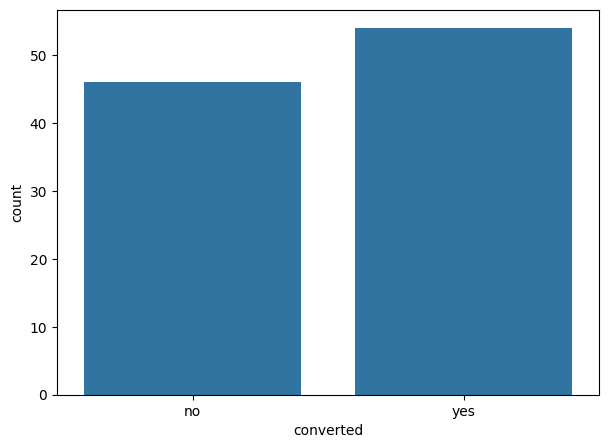

In [ ]:
# Plot showing the numbers of the converted subscribers
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'converted')
plt.show()

In [ ]:
# code to produce the number of subscribers that are converted or not.
df['converted'].value_counts(normalize = True)


converted
yes    0.54
no     0.46
Name: proportion, dtype: float64

##Observations
#### From the number of users that visited the landing page, 54% were converted to subscribers while 46% were not.

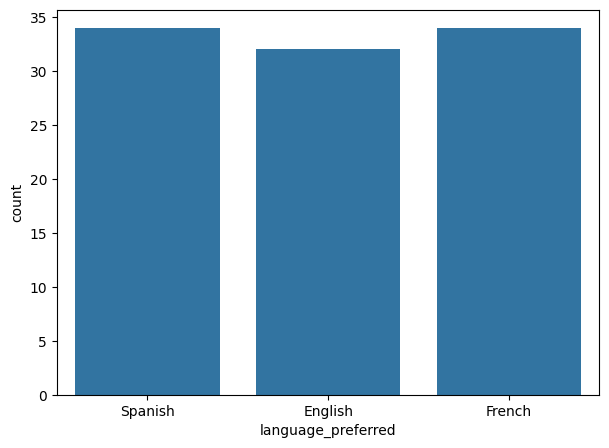

In [ ]:
# Plot showing the languages preferred by the users
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'language_preferred')
plt.show()

In [ ]:
#code that displays the distribution of the languages preferred by the users.
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

##Observations
####It will be observed both from the chart and the code that users have an equal preferences for both Spanish and French languages while the English Language is the least language preferred by the users.

### Bivariate Analysis

## Relationship between the Conversion status and Time spent on the page

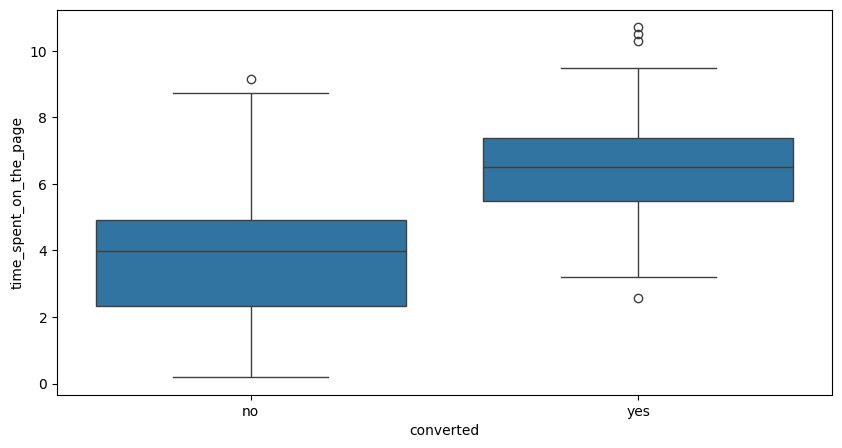

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

##Observations
####It will be observed that there is a relationship between the users that were converted to subscribers and those that were not and the corresponding time they spent on the page. Most of the summary statistics (i.e the minimum, 25% quartile, Median, 75% quartile and the maximum) for the 'Yes' group were higher than the 'No' group and therefore it is no surprising that the users in the 'Yes' group were converted to subscribers. Also, outliers were observed in both groups.

## Relationship between the Landing Page and Time spent on the page

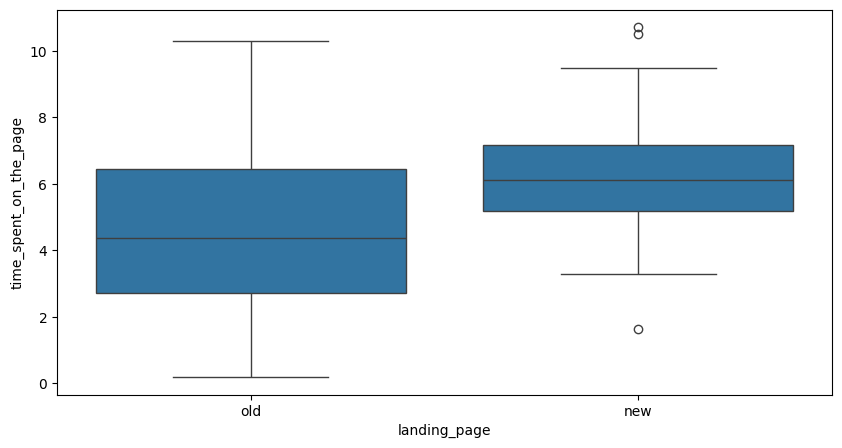

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

##Observations
#### It will be observed that the summary statistics as revealed by the boxplots which includes the minimum, 25% quartile, the median and the 75% quartile of the time spent by the users on the new landing page were all higher than their corresponding values spent by the users on the oil landing page. Also a number of outliers were observed for the users visiting the new landing page

## Relationship between the Language preference and Time spent on the page

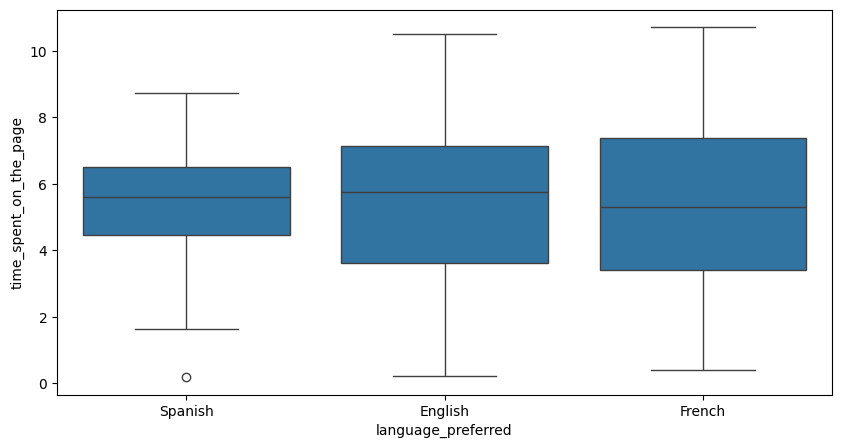

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

##Observations
####It will be observed that the median time spent on the page by the users that have a preference for Spanish language and English language are almost the same whereas it is slightly lower for the users that prefer the French language. Also, the summary statistics shown on the boxplot (minimum, 25% quartile, median, 75% quartile and maximum) for the users preferring English Language and French language are almost the same except that the median is slightly lower for the users that prefer French language. Also, an outlier was only observed for the users that prefer the Spanish language.

## Relationship between the Group and Time spent on the page

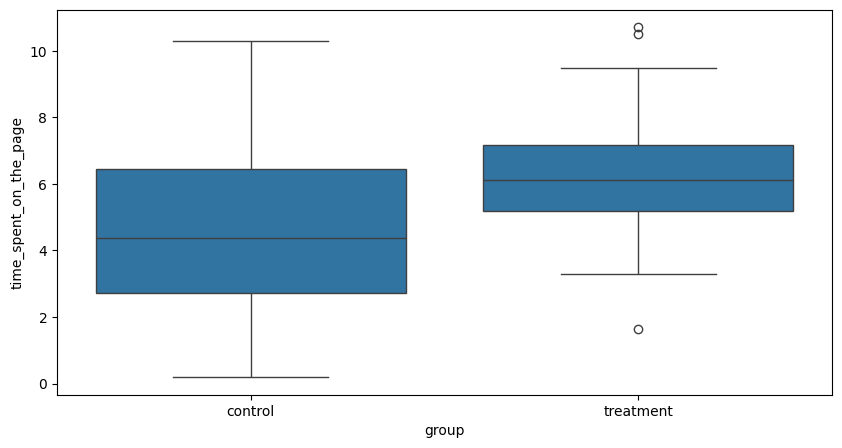

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'group', y = 'time_spent_on_the_page')
plt.show()

##Observation
####It will be observed that the median time spent on the page for the users under the treatment group is higher than the median time spent on the page for the users under the control group. A number of outliers were also observed for the users under the treatment group.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

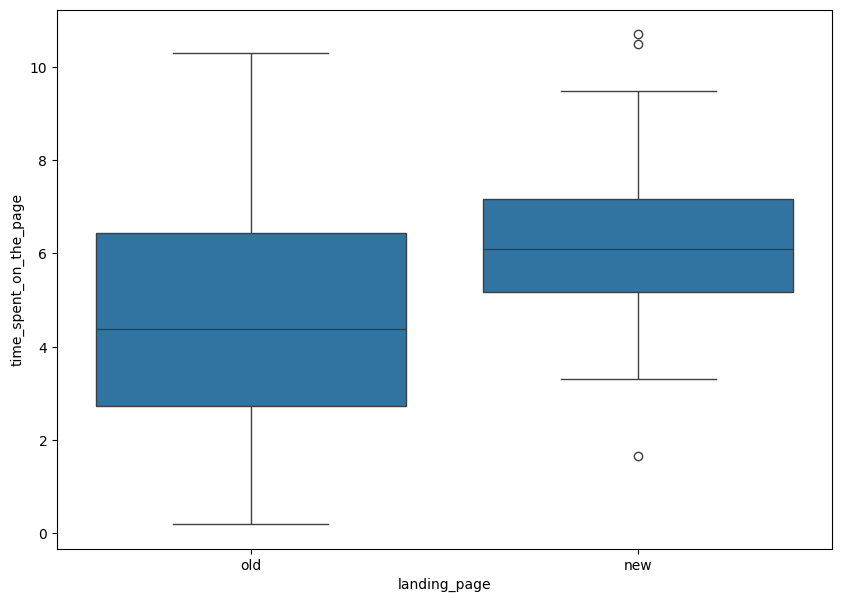

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

In [ ]:
df.groupby('landing_page')['time_spent_on_the_page'].sum()
#The codes groups the users according to those that visits the oil and new landing page and then sums the total time spent by the users


landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

##Observations
####From both the chart and the codes above, it clearly shows that the users spent more time in the new page compared to the old page. For instance, the median time spent by the users on the new page is greater than the median time spent by the users on the old page. Also, in total, the users spent about 311.16 minutes (about 5 hrs) on the new page as against 226.62 minutes (about 4 minutes) on the old page. However further statistical analysis will be carried out to conclusively give an answer to the question.

##Step 1: Define the null and alternate hypotheses

####H0 :T_nlp <= T_olp

####Ha :T_nlp > T_olp
####where T_nlp is the time spent by users on the new landing page
####where T_olp is the time spent by users on the new landing page

##Step 2: Select Appropriate test

####Since two independent samples were taken, it means that 2 samples means can be obtained from the 2 populations. And since the variance of the populations are not known, the appropriate test to use will be the **one-tailed,2 samples(independent) T-test.**
####The time spent on the landing page is a continuous data, Population is normally distributed, samples are from two-independent populations and finally the users were selected randomly

##Step 3: Decide the significance level

####In the problem statement, the level of significance was given as  α=0.05 .

##Step 4: Collect and prepare data

In [ ]:
# In order to calculate the sample mean and standard deviation of the time the users spent on the new and old landing page,
#separate datasets will have to be created for the two variables.
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# The code above creates a new dataset containing the time spent by the users on the new landing page

time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
# The code above creates a new dataset containing the time spent by the users on the new landing page

In [ ]:
# Calculate the standard deviation on the time spent by the users in both the new and old landing pages
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


##Observation
####Based on the values of the standard deviation of the two samples where the standard deviation of the time spent by the users on the old page is almost twice the time that the users spent on the new page, it can be assumed that the population standard deviation are not equal.

##Step 5: Calculate the p value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind
# code to calculate the p-value and test_stat
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative ='greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


##Step 6: Compare the p-value with  α

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


##Step 7: Draw inference

##Insight
####As the p-value (~0.000139) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the users spend more time on the new landing page than on the old or existing landing page and this also confirms the result of the visual analysis earlier performed and also the result from the code.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
# Code that will give the proportion of users who visits both the old and new landing pages and gets converted or not.
df.groupby('landing_page')['converted'].value_counts(normalize=True)

landing_page  converted
new           yes          0.66
              no           0.34
old           no           0.58
              yes          0.42
Name: proportion, dtype: float64

##Observation
####It will be observed that 66% of the users who visits the new landing page gets converted and become subscribers as against 58% conversion of users who visited the old landing page. However, this assertion will be further tested using statistical analysis.

##Visual Analysis

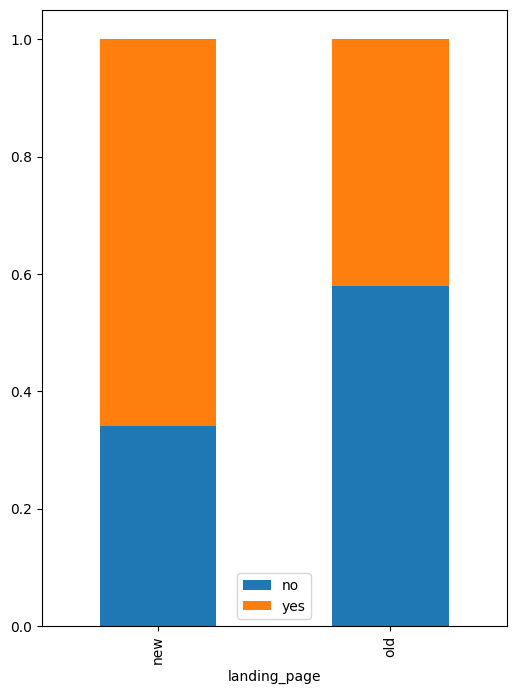

In [ ]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
# This code will give a stack plot showing the conversion rate of users who visited the new and old landing pages
plt.legend()
plt.show()

##Observation
####It can be clearly seen from the chart that the proportion of users who visited the new landing page and are converted (orange colour) is significantly greater than the conversion rate of the users who visited the old landing page

##Step 1: Define the null and alternate hypotheses

####H0: CR_N <= CR_O

####Ha: CR_N > CR_O
####where
####CR_N = Conversion rate for the users visiting the new landing page
####CR_O = Conversion rate for users vising the old landing page

##Step 2: Select Appropriate test

####This is a one-tailed test concerning two population proportions from two independent populations, therefore the **two proportion z-test** will be used.

##Step 3: Decide the significance level

#### As stated in the problem statement, we select α = 0.05.

##Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df['group'].value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


##Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


##Step 6: Compare the p-value with  α

##Insight
####As the p-value (~0.00803) is less than the level of significance (0.05), we can reject the null hypothesis. Hence, we do have enough statistical evidence to support the claim that the conversion rate for the users who visited the new landing page is greater than the converstion rate of the users who visited the old landing page. This is also a confirmation from the assertion stated earlier that 66% of the users who visited the new landing page gets converted to subscribers as against 58% who visited the old landing page. This claim is also corroborated with the visual representation on the bar graph.

## 3. Is the conversion and preferred language are independent or related?

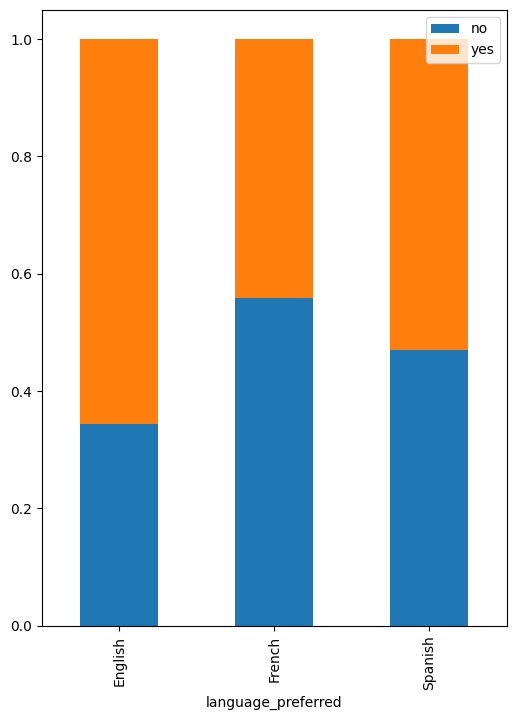

In [14]:
# code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

##Observation
####From the chart, it will be noted that the conversion and the preferred language are related because it seems that the users that are converted prefers English language more than all the languages with French language the least preferred.

##Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion rate and preferred language are dependent

$H_a:$ Conversion rate and preferred language are independent



##Step 2: Select Appropriate test

####This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Also, since the number of observations in each category is greater than 5 and the samples are randomly selected, then the appropriate test to be selected is the **Chi-Square test for independence**

##Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

##Step 4: Collect and prepare data

In [ ]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


##Step 5: Calculate the p-value

In [ ]:
#Code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


##Step 6: Compare the p-value with  α

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


##Step 7: Draw inference

####Since the p-value (~0.2129) is significantly greater than the level of significance (0.05), then we fail to reject the null hypothesis which implies that on the basis of statistical significance, the conversion rate and the preferred language are dependent which is also corroborated with the insight gleaned from the chart above.

In [ ]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


In [ ]:
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

## 4. Is the time spent on the new page same for the different language users?

In [5]:
#Code to obtain a new dataframe consisting only of users served the new landing page
df_new = df[df['landing_page']=='new']


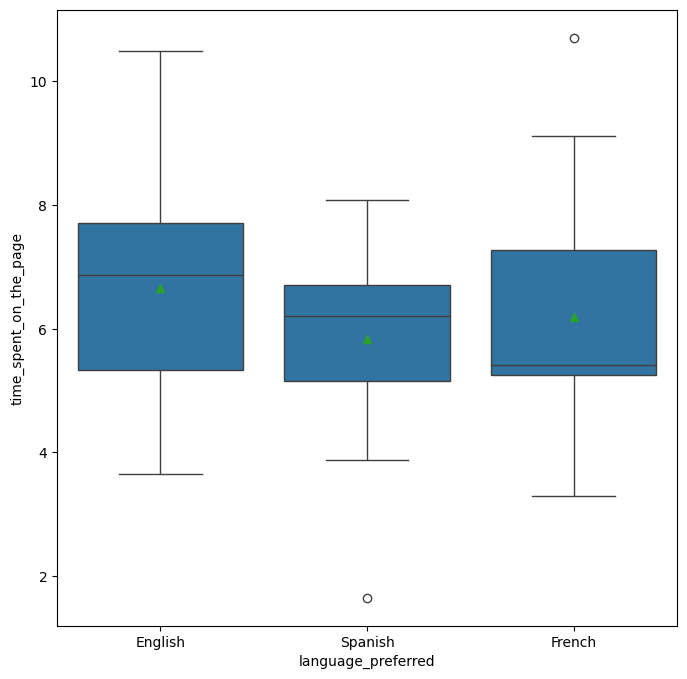

In [6]:
# Plot to visually show the time spent by the users based on their preferred languages
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [7]:
# code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


##Observation
####The mean time spent by the users on the new landing page based on their preferred languages are not the same as shown on the chart and also the result of the codes. Users who preferred English language spent an average of 6.66 minutes which is the highest, closely followed by users who preferred French language with an average of 6.20 minutes. The lowest are users who preferred Spanish language with an average time of 5.84 minutes spent on the new landing page.

##Step 1: Define the null and alternate hypotheses

$H_0:$ At least one of the mean of the time spent by users are different for different language users

$H_a:$ Mean of time spent are the same for the different language users.




##Step 2: Select Appropriate test

####This is a problem involving three population means and the appropriate test to use is the **one-way ANOVA Test**

##Step 3: Decide the significance level

####According to the problem statement, we are to use the 5% level of significance, i.e. α = 0.05.

##Step 4: Collect and prepare data

In [8]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by Spanish users
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

##Step 4a: Test for Normality
####: The Shapiro-Wilks Test will be used to test for the Normality.


### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time spent on the page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ The time spent on the page does not follow a normal distribution

In [9]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


####Since p-value of the test is very large, we fail to reject the null hypothesis that the time spent by the different language users follows the normal distribution

##Step 4b: Test for equality of variance
####The Levene test will be used to test for the equality of variance
####Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [11]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'],
                                   df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'],
                                   df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


####Since the p-value is large, we fail to reject the null hypothesis of homogeneity or equality of variances.
####It therefore means that the populations are normally distributed (Shapiro-Wilks test), There is homogeneity of variance (Levene's test) and the samples were randomly selected and are independent.

##Step 5: Calculate the p-value

In [12]:
#code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value =f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


##Insight
####Since the p-value is much greater than the significance level, we will fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that at least one mean of the time spent by the users is different from the rest at 5% significance level.

## Conclusion and Business Recommendations

####- The average time spent by a user on a page is about 5.4 minutes and the time ranges from 0.19 minutes to 10.71 minutes. Since the mean and median time spent by a user are similar, it means that the time spent by users on a page will be normally distributed.
####- The number of users that spends between 5 to 6 minutes on the page accounts for the highest number compare to other users.
####From the number of users that visited the landing page,54% were converted to subscribers while 46% were not.
####- There is a relationship between the number of users that were converted to subscribers and the corresponding time they spent on the page.Most of the summary statistics (i.e the minimum, 25% quartile, Median, 75% quartile and the maximum) as revealed by the boxplot for the 'Yes' group were higher than the 'No' group and therefore it is no surprising that the users in the 'Yes' group were converted to subscribers.
####- It will be observed that the median time spent on the page by the users that have a preference for Spanish language and English language are almost the same whereas it is slightly lower for the users that prefer the French language
####- Users spent more time in the new page compared to the old page. For instance, the median time spent by the users on the new page is greater than the median time spent by the users on the old page. Also, in total, the users spent about 311.16 minutes (about 5 hrs) on the new page as against 226.62 minutes (about 4 minutes) on the old page.
####- We do have enough evidence to support the claim that the users spend more time on the new landing page than on the old or existing landing page based on 0.05 level of significance.
####- It will be observed that 66% of the users who visits the new landing page gets converted and become subscribers as against 58% conversion of users who visited the old landing page.
####- We do have enough statistical evidence to support the claim that the conversion rate for the users who visited the new landing page is greater than the converstion rate of the users who visited the old landing page.
####- On the basis of statistical evidence, the conversion rate and the preferred language by the subscribers are dependent
####- We do have enough statistical significance to conclude that at least one mean of the time spent by the users is different from the rest at 5% significance level.
##Recommendations
####- The new landing page should be adopted by Enews since it had more engagements and users converted to subscribers
####- The sample size can be increased so that the sample statistics will closely resemble that of the population.
####- User demographics such as age, country, sex etc can be included in future test so that targeted campaigns can be done.

___